In [1]:
from openalea.stat_tool import __stat_tool

In [2]:
ss = __stat_tool.std._BasicOstringstream_316571d6f3fa564aab8b7a00819385a8(__stat_tool.std.ios_openmode.S__OUT)

In [3]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/dist-packages/ipython-4.0.0-py2.7.egg/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Analyzing the number of internodes per growth unit

**Abstract**
This notebook aims at analyzing the number of nodes of growth units in selected architectural  position considering the respective roles of preformation and neoformation using

* comparison tests,
* one-way variance analysis,
* estimation of finite mixture of distributions.

**Keywords**
comparison test; anova; finite mixture; architecture analysis;

## Introduction

## Material & methods

Data sets files are avaible in the `../share/data` directory.

* Wild cherry tree, number of nodes per growth unit (GU), 

    * data: Dominique Fournier,
    * files: 
    
        * meri1.his: order 1,
        * meri2.his: order 2,
        * meri3.his: order 3, GU 1,
        * meri4.his: order 3, GU 2,
        * meri5.his: short shoots.
        
* Poplar:,number of nodes per growth unit, 

    * data: Yves Caraglio and Herve Rey,
    * files:
      
        * peup1.his: order 2,
        * peup2.his: order 3,
        * peup3.his: order 4,
        * peup4.his: order 5,
        * peup5.his: order 3, GU 4,
        * peup6.his: order 3, acrotony.
        
## Results

The `OpenaAlea.StatTool` package is used

In [4]:
from openalea.stat_tool import stat_tool

using the extensions

* `mplotlib` to enable plots of `OpenAlea.StatTool` objects using the matplotlib package

In [5]:
%reload_ext openalea.stat_tool.mplotlib

* `aml` to activate a `OpenAlea.StatTool` **AML-like** interface

In [6]:
%reload_ext openalea.stat_tool.aml

In [7]:
meri1 = stat_tool.Histogram("../share/data/meri1.dat")
meri2 = stat_tool.Histogram("../share/data/meri2.dat")
meri3 = stat_tool.Histogram("../share/data/meri3.dat")
meri4 = stat_tool.Histogram("../share/data/meri4.dat")
meri5 = stat_tool.Histogram("../share/data/meri5.dat")
meri0 = stat_tool.Merge(meri1, meri2, meri3, meri4, meri5)

In [9]:
stat_tool.ComparisonTest("F", meri1, meri2)

F-test (88 degrees of freedom, 75 degrees of freedom)
F-value: 1.21097   critical probability: 0.19769
reference F-value: 1.44897   reference critical probability: 0.05



In [10]:
stat_tool.ComparisonTest("T", meri1, meri2)

two-sided t-test (162 degrees of freedom)
t-value: 1.87611   critical probability: 0.0624397
reference t-value: 1.97472   reference critical probability: 0.05



In [11]:
stat_tool.ComparisonTest("W", meri1, meri2)

two-sided Wilcoxon-Mann-Whitney test
standard normal value: 1.45438   critical probability: 0.145841
reference standard normal value: 1.95996   reference critical probability: 0.05
P(X1 < X2) = 0.400651   P(X1 = X2) = 0.0674157   P(X1 > X2) = 0.531934



In [12]:
stat_tool.ComparisonTest("F", meri1, meri3)

F-test (75 degrees of freedom, 119 degrees of freedom)
F-value: 1.23739   critical probability: 0.148703
reference F-value: 1.40075   reference critical probability: 0.05



In [13]:
stat_tool.ComparisonTest("T", meri1, meri3)

two-sided t-test (147 degrees of freedom)
t-value: 8.39242   critical probability: 3.63812e-14
reference t-value: 1.97623   reference critical probability: 0.05
reference t-value: 2.60969   reference critical probability: 0.01



In [14]:
stat_tool.ComparisonTest("W", meri1, meri3)

two-sided Wilcoxon-Mann-Whitney test
standard normal value: 7.44031   critical probability: 1.00447e-13
reference standard normal value: 1.95996   reference critical probability: 0.05
reference standard normal value: 2.57583   reference critical probability: 0.01
P(X1 < X2) = 0.160197   P(X1 = X2) = 0.0501096   P(X1 > X2) = 0.789693



<IPython.core.display.Javascript object>


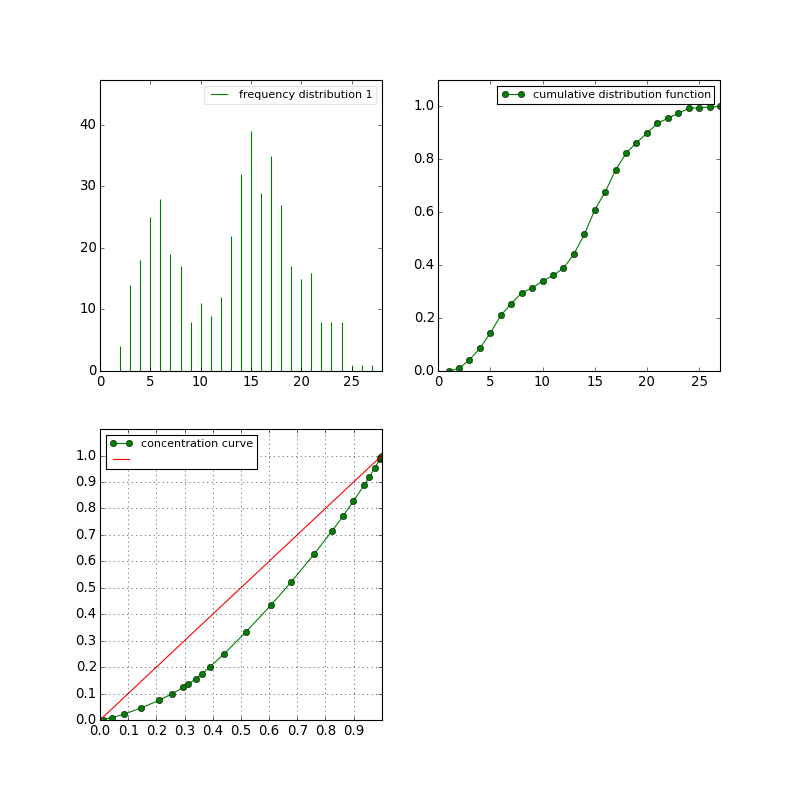

In [8]:
meri0.plot()
plt.show()

estimation of a mixture of two distributions assuming a first sub-population of GUs made only of a preformed part and a second sub-population made of both a preformed part
and a neoformed part

In [19]:
from openalea.stat_tool import __stat_tool
error = __stat_tool.stat_tool.StatError(__stat_tool.stat_tool.NB_ERROR)
v = __stat_tool.std._Vector_a0d6e5da7dec5b598e07f046e4fb632f()
v.push_back(stat_tool.discrete_parametric.BINOMIAL)
v.push_back(stat_tool.discrete_parametric.BINOMIAL)
v.push_back(stat_tool.discrete_parametric.BINOMIAL)
v.push_back(stat_tool.discrete_parametric.BINOMIAL)
ss = __stat_tool.std.Ostringstream(__stat_tool.std.ios_openmode.S__OUT)
mixt = meri0.discrete_mixture_estimation(error, ss, 1, 4, v, 0, True, True, __stat_tool.stat_tool.model_selection_criterion.BIC, 0.1)
print ss.str()
if error.get_nb_error() > 0:
    ss = __stat_tool.std.Ostringstream(__stat_tool.std.ios_openmode.S__OUT)
    error.ascii_write(ss, __stat_tool.stat_tool.error_type.ERROR)
    raise Exception(ss.str())


NEGATIVE_BINOMIAL   INF_BOUND : 0   PARAMETER : 7.97852   PROBABILITY : 0.378193

1 distribution   2 * log-likelihood: -2735.4   3 free parameters   2 * penalyzed log-likelihood (BIC): -2753.54   weight: 1



Exception: *** ERROR : estimation failure


In [22]:
mixt